In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_sarcastic=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Sarcasm_Hindi_Tweets-SARCASTIC.csv")

In [ ]:
df_sarcastic['Label']="Sarcastic"

In [ ]:
df_sarcastic=df_sarcastic[["text","Label"]]

In [ ]:
df_sarcastic

,text,Label
0,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
1,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
2,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
3,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
4,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
...,...,...
6046,Sone Ki Chain Important Nhi Hoti\nBalki\nChain...,Sarcastic
6047,@IACAbhi @myvivek1989 kya baat kr rhe ho..\n\n...,Sarcastic
6048,Corona se Bachne Ke Liye Ghar par rahe\n.\n.\n...,Sarcastic
6049,Me : kisi ne bataya tum kitni khubsurat ho?\n\...,Sarcastic


In [ ]:
df_nonsarcastic=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Sarcasm_Hindi_Tweets-NON-SARCASTIC.csv")

In [ ]:
df_nonsarcastic['Label']="Non-Sarcastic"

In [ ]:
df_nonsarcastic=df_nonsarcastic[["text","Label"]]

In [ ]:
df_nonsarcastic

,text,Label
0,🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃\n\nकभी न बुझती है \nवो प्यास है #ज...,Non-Sarcastic
1,"डिप्रेशन के शुरुआती आठ लक्षण, उदाहरण और इलाज\n...",Non-Sarcastic
2,@FaiziJee98 Aaj apki saalgirah hy nahi 🙊😛 or j...,Non-Sarcastic
3,🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃\n\nकभी न बुझती है \nवो प्यास है #ज...,Non-Sarcastic
4,#Happy rathyatra https://t.co/flLVnffvOJ,Non-Sarcastic
...,...,...
10123,स्वर्गीय श्री सुशांत सिंह राजपूत ने हमें छिछोर...,Non-Sarcastic
10124,बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लग...,Non-Sarcastic
10125,#SushantSinghRajput #Suicide क्यों?? चमक धमक ...,Non-Sarcastic
10126,हर हाल में #खुश रहना सीख लो🙃\n उस दिल क...,Non-Sarcastic


In [ ]:
import re
english_pattern = re.compile(r'[a-zA-Z]+')
hindi_range = r'\u0900-\u097F'

# Clean Hindi tweets
def clean_hindi(tweet):
    cleaned_tweet = ""
    for word in tweet.split():
        if english_pattern.match(word):
            cleaned_tweet += word + " "
        else:
            cleaned_word = re.sub(r'[^'+hindi_range+'\s]', '', word)
            cleaned_tweet += cleaned_word + " "
    return cleaned_tweet

In [ ]:
df_sarcastic['text'] = df_sarcastic['text'].apply(clean_hindi)
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(clean_hindi)

In [ ]:
# Remove URLs
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

# Remove usernames or mentions
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(r'@[^\s]+', '', x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

# Remove hashtags
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(r'#\w+', '', x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

In [ ]:
df_sarcastic['text'] = df_sarcastic['text'].str.lower()
df_nonsarcastic['text'] = df_nonsarcastic['text'].str.lower()

In [ ]:
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(r'\d+', '', x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
import regex

def remove_emojis(text):
    # Remove emojis using regular expression
    cleaned_text = regex.sub(r'\p{So}', '', text)
    return cleaned_text

In [ ]:
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: remove_emojis(x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: remove_emojis(x))

In [ ]:
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')

In [ ]:
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(url_pattern, '', x))
df_sarcastic['cleaned_text'] = df_sarcastic['text'].apply(lambda x: re.sub(email_pattern, '', x))

In [ ]:

df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(url_pattern, '', x))
df_nonsarcastic['cleaned_text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(email_pattern, '', x))

In [ ]:
import string
df_sarcastic['cleaned_text'] = df_sarcastic['cleaned_text'].apply(lambda x: ''.join(char for char in x if char not in string.punctuation))

In [ ]:
df_nonsarcastic['cleaned_text'] = df_nonsarcastic['cleaned_text'].apply(lambda x: ''.join(char for char in x if char not in string.punctuation))

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

stopwords_english = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
stopwords_hindi = [
    "अंदर", "अत", "अपना", "अपनी", "अपने", "अभी", "आदि", "आप", "इत्यादि", "इन",
    "इनका", "इन्हीं", "इन्हें", "इन्होंने", "इस", "इसका", "इसकी", "इसके", "इसमें",
    "इसी", "इसे", "उन", "उनका", "उनकी", "उनके", "उनको", "उन्हीं", "उन्हें", "उन्होंने",
    "उस", "उसके", "उसी", "उसे", "एक", "एवं", "एस", "ऐसे", "और", "कर",
    "करता", "करते", "करना", "करने", "करें", "कहते", "कहा", "का", "काफ़ी", "कि",
    "कितना", "किन्हें", "किन्हों", "किया", "किर", "किस", "किसी", "किसे", "की", "कुछ",
    "कुल", "के", "को", "कोई", "कौन", "कौनसा", "गया", "घर", "जब", "जहाँ",
    "जा", "जितना", "जिधर", "जिन", "जिन्हें", "जिन्हों", "जिस", "जिसे", "जीतने", "जीतो",
    "तक", "तब", "तरह", "तिन्हें", "तिन्हों", "तिस", "तिसे", "तो", "तोह", "था",
    "थी", "थे", "दबारा", "दिया", "दुसरे", "देखा", "देखो", "दो", "द्वारा", "न",
    "नहीं", "ना", "निचे", "निहायत", "नीचे", "ने", "पर", "पहले", "पुरा", "पूरा",
    "पे", "फिर", "बनी", "बही", "बहुत", "बाद", "बाला", "बिलकुल", "भी", "भीतर",
    "मगर", "मानो", "मे", "में", "यदि", "यह", "यहाँ", "यही", "या", "यिह",
    "ये", "रखें", "रवासा", "रहा", "रहे", "ऱ्वासा", "लिए", "लिये", "लेकिन", "व",
    "वगेरह", "वर्ग", "वह", "वहाँ", "वहीं", "वाले", "वुह", "वे", "वग़ैरह", "संग",
    "सकता", "सकते", "सबसे", "सभी", "साथ", "साबुत", "साभ", "सारा", "से", "सो",
    "ही", "हुआ", "हुई", "हुए", "है", "हैं", "हो", "होता", "होती", "होते", "होना",
    "होने"
]

In [ ]:
import nltk

# Delete and re-download the 'punkt' package
nltk.data.path = ['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/share/nltk_data', '/usr/local/lib/nltk_data']
nltk.download('punkt', force=True)  # Force download to fix corrupted files
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df_sarcastic['cleaned_text'] = df_sarcastic['cleaned_text'].apply(lambda x: ' '.join(word for word in nltk.word_tokenize(x) if word.lower() not in stopwords_english and word.lower() not in stopwords_hindi))

In [ ]:
df_nonsarcastic['cleaned_text'] = df_nonsarcastic['cleaned_text'].apply(lambda x: ' '.join(word for word in nltk.word_tokenize(x) if word.lower() not in stopwords_english and word.lower() not in stopwords_hindi))

In [ ]:
df_nonsarcastic=df_nonsarcastic.loc[:6050]

In [ ]:
data = pd.concat([df_sarcastic, df_nonsarcastic], axis=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['Label'], random_state=50)

In [ ]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 101.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=62b68f3fa2f33dec25fbc82b6da3faa3df033486f681df46a6444cba99932910
  Stored in directory: /root/.cache/pip/wheels/a6/b9/88/364e4ea6461e9f1feee834bfc2f15b92edc62600e08e3d3f5f
  Created wheel for keras_bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33500 sha256=6b415e09ac732a31e1fc720a040618

In [ ]:
pip install tf_keras

In [ ]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = "1"

In [ ]:
pip install tensorflow==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found exis

In [ ]:
import tensorflow as tf

import ktrain
from ktrain import text
t = text.Transformer("monsoon-nlp/hindi-bert", maxlen=500, class_names=list(set(y_train.values)))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/58.9M [00:00<?, ?B/s]

In [ ]:
trn = t.preprocess_train(X_train.to_numpy(), y_train.to_numpy())

preprocessing train...
language: hi
train sequence lengths:
	mean : 21
	95percentile : 32
	99percentile : 35


/usr/local/lib/python3.11/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/607k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False


In [ ]:
evalr = t.preprocess_test(X_test.to_numpy(), y_test.to_numpy())

preprocessing test...
language: hi
test sequence lengths:
	mean : 21
	95percentile : 32
	99percentile : 35


In [ ]:
model = t.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
1512/1512 [==============================] - 1370s 863ms/step - loss: 0.6891 - accuracy: 0.5888
Epoch 2/10
1512/1512 [==============================] - 1306s 864ms/step - loss: 0.6362 - accuracy: 0.7813
Epoch 3/10
1512/1512 [==============================] - 1306s 864ms/step - loss: 0.3486 - accuracy: 0.8827
Epoch 4/10
1512/1512 [==============================] - 1306s 864ms/step - loss: 0.1756 - accuracy: 0.9370
Epoch 5/10
1512/1512 [==============================] - 1305s 863ms/step - loss: 0.4483 - accuracy: 0.7183
Epoch 6/10
1512/1512 [==============================] - 82s 54ms/step - loss: 0.6940 - accuracy: 0.4965


done.
Visually inspect loss plot and select learning rate associated with falling loss


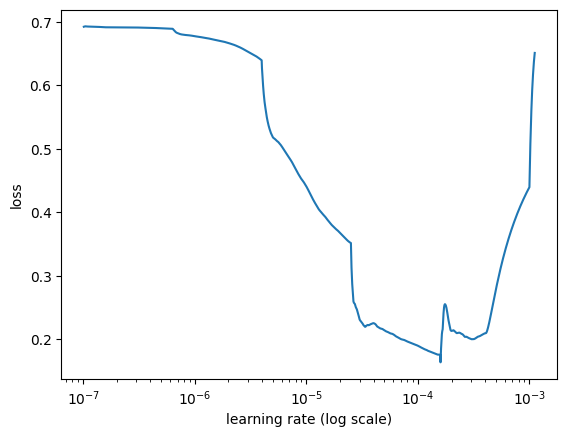

In [ ]:
learner.lr_find(show_plot=True, max_epochs=10)

In [ ]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)
learner.fit_onecycle(1e-4, 3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
1513/1513 [==============================] - 1388s 888ms/step - loss: 0.2999 - accuracy: 0.8831 - val_loss: 0.3074 - val_accuracy: 0.8358
Epoch 2/3
1513/1513 [==============================] - 1333s 881ms/step - loss: 0.1118 - accuracy: 0.9632 - val_loss: 0.0224 - val_accuracy: 0.9924
Epoch 3/3
1513/1513 [==============================] - 1332s 880ms/step - loss: 0.0161 - accuracy: 0.9938 - val_loss: 0.0022 - val_accuracy: 0.9987


In [ ]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)
learner.fit_onecycle(1.2e-4, 5)



begin training using onecycle policy with max lr of 0.00012...
Epoch 1/5
1513/1513 [==============================] - 1390s 890ms/step - loss: 0.2992 - accuracy: 0.8780 - val_loss: 0.1630 - val_accuracy: 0.9309
Epoch 2/5
1513/1513 [==============================] - 1333s 881ms/step - loss: 0.1053 - accuracy: 0.9601 - val_loss: 0.0157 - val_accuracy: 0.9964
Epoch 3/5
1513/1513 [==============================] - 1334s 881ms/step - loss: 0.0477 - accuracy: 0.9828 - val_loss: 0.0228 - val_accuracy: 0.9954
Epoch 4/5
1513/1513 [==============================] - 1333s 881ms/step - loss: 0.0135 - accuracy: 0.9965 - val_loss: 0.0038 - val_accuracy: 0.9987
Epoch 5/5
1513/1513 [==============================] - 1334s 882ms/step - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0075 - val_accuracy: 0.9990


In [ ]:
learner.save_model("sample_data/Model.hp5")

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
import random
list_of_num=[]
for i in range(15):
  x = random.randint(1,100)
  list_of_num.append(x)

In [ ]:
list_of_num

[22, 46, 49, 53, 12, 50, 65, 66, 75, 51, 74, 2, 38, 86, 27]

In [ ]:
for i in list_of_num:
  print('Actual Text = ', X_test.iloc[i])
  print('\n')
  print("+"*50)
  print("Predicted Label = ",predictor.predict(X_test.iloc[i]))
  print('Actual Label = ',y_test[i]) # Changed line to use array indexing
  print("-"*50)

Actual Text =  मुझे खैरात मिली खुशियां अच्छी लगती मैं अपनेगमों रहता हॅू नवाबोंकीतरह


++++++++++++++++++++++++++++++++++++++++++++++++++
Predicted Label =  Non-Sarcastic
Actual Label =  0
--------------------------------------------------
Actual Text =  खत्म ख्वाहिशों हमारे सपनों सजाता वो पिता जो खुद पीछे रहकर हमें आगे बढ़ाता सब कुर्बान देता सारे सुख हमारे नाम देता बेटा मेरा उड़े आसमान सोचकर पापा पंख नीलाम देता fathers


++++++++++++++++++++++++++++++++++++++++++++++++++
Predicted Label =  Non-Sarcastic
Actual Label =  0
--------------------------------------------------
Actual Text =  इतनी नफ़रत कहाँ लाते तुम लोग क्या मिल जाता मरने नही छोड़ते देश ग़म डूबा खुशी मना हाँ जो प्यार बढ़ावा दे नफ़रत उपदेशराणा चेक करिये


++++++++++++++++++++++++++++++++++++++++++++++++++
Predicted Label =  Non-Sarcastic
Actual Label =  0
--------------------------------------------------
Actual Text =  नफरतों बाजार जीने अलग मजा लोग रूलाना छोडते जिंदादिल हसना छोडते ।


++++++++++++++++++++++++++++++++++++++++

In [ ]:
learner.view_top_losses(n=4)

95/95 [==============================] - 24s 254ms/step
----------
id:479 | loss:7.48 | true:0 | pred:1)

----------
id:773 | loss:7.48 | true:0 | pred:1)

----------
id:1652 | loss:7.48 | true:0 | pred:1)



In [ ]:
learner.top_losses(n=4)

95/95 [==============================] - 24s 256ms/step


[(479, 7.4782534, '0', '1'),
 (773, 7.4782534, '0', '1'),
 (1652, 7.4782534, '0', '1')]

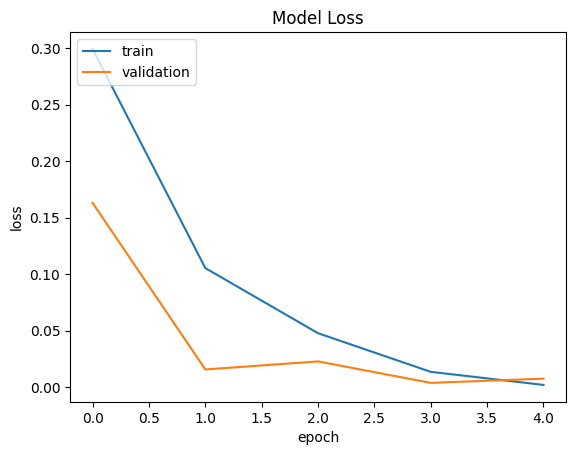

In [ ]:
learner.plot()

In [ ]:
learner.print_layers()

0 (trainable=True) : <transformers.models.electra.modeling_tf_electra.TFElectraMainLayer object at 0x7faf462271d0>
1 (trainable=True) : <transformers.models.electra.modeling_tf_electra.TFElectraClassificationHead object at 0x7faf4625ca90>


In [ ]:
 from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
len(X_test)

3026

In [ ]:
y_pred=[]
for i in range(len(X_test)):
  k=predictor.predict(X_test.iloc[i])
  y_pred.append(k)

In [ ]:
y_pred

['Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarc

In [ ]:
y_test

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
y_pred = pd.Series(y_pred)

In [ ]:
y_pred

,0
0,Sarcastic
1,Sarcastic
2,Non-Sarcastic
3,Sarcastic
4,Non-Sarcastic
...,...
3021,Sarcastic
3022,Sarcastic
3023,Non-Sarcastic
3024,Non-Sarcastic


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
label_encoder2 = LabelEncoder()
y_pred = label_encoder2.fit_transform(y_pred)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00      1514

    accuracy                           1.00      3026
   macro avg       1.00      1.00      1.00      3026
weighted avg       1.00      1.00      1.00      3026



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

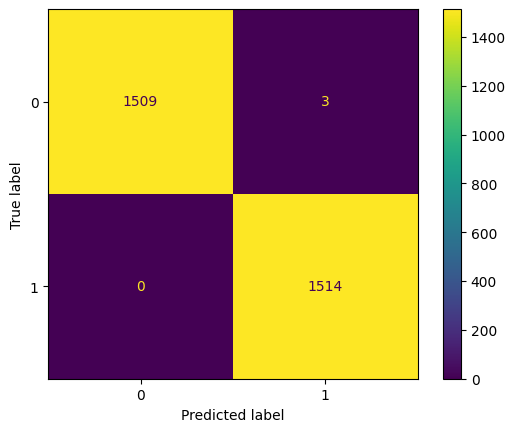

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()
